Dodanie bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# narzedzia
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RepeatedStratifiedKFold,
    GridSearchCV
)
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree

# modele + Smote
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Wczytanie danych oraz prezentacja

In [2]:
# dataset.py.df()
df = pd.read_csv("D:/ml/xgboost-main/data/ssh_logs/SSH.csv")
df = df.drop(columns=["user", "ts"])
print(df.columns)
df.head()

Index(['is_private', 'is_failure', 'is_root', 'is_valid', 'not_valid_count',
       'ip_failure', 'ip_success', 'no_failure', 'first', 'td', 'target'],
      dtype='object')


,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td,target
0,1,1,0,1,0,1,0,2,1,0,0
1,1,1,0,1,0,2,0,3,0,18,0
2,1,0,0,1,0,0,1,0,0,133,0
3,1,1,0,1,0,1,1,2,0,58,0
4,1,1,0,1,0,2,1,3,0,29,0


y1 jako dane wyjsciowe oraz X1 jako dane testowe do uczenia sie

In [3]:
""" features = ['is_private', 'is_failure', 'is_root', 'is_valid', 'not_valid_count',
       'ip_failure', 'ip_success', 'no_failure', 'first', 'td']
target = ['target']

X = df[features]
y = df[target]
 """
y = df["target"]
X = df.drop(columns=["target"])

przygotowanie probek testowych oraz do uczenia modelu

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
X_test.head()

(226, 10)
(57, 10)


,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td
214,1,1,0,0,2,4,0,13,0,9
86,1,1,0,0,6,6,0,6,0,9
280,1,0,0,1,0,0,1,0,0,7
246,1,0,0,1,0,0,26,0,0,900
58,1,0,0,1,0,0,2,0,0,131


In [5]:
# cross val z KFOLD
""" kf = KFold(n_splits=10)
for i, (train_index, test_index) in enumerate(kf.split(X1)):
    print(f"Fold {i}:")
    print(f"  Training dataset index: {train_index}")
    print(f"  Test dataset index: {test_index}") """

' kf = KFold(n_splits=10)\nfor i, (train_index, test_index) in enumerate(kf.split(X1)):\n    print(f"Fold {i}:")\n    print(f"  Training dataset index: {train_index}")\n    print(f"  Test dataset index: {test_index}") '

In [6]:
""" model_LR = LogisticRegression(                          #LR dla niezbalansowanych   
    random_state = 0,
    max_iter=100
    )  

model_LR_SMOTE = LogisticRegression(                    #LR dla zbalansowanych   
    random_state = 0,
    max_iter=100
    ) 

cv = KFold(n_samples = 10, shuffle=True, random_state=42)

cross_val_results = cross_val_score(model_LR, X_train, y_train, scoring="accuracy", cv=cv)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

cross_val_results2 = cross_val_score(model_LR, X_train_sm, y_train_sm, scoring="accuracy", cv=cv)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}') """

' model_LR = LogisticRegression(                          #LR dla niezbalansowanych   \n    random_state = 0,\n    max_iter=100\n    )  \n\nmodel_LR_SMOTE = LogisticRegression(                    #LR dla zbalansowanych   \n    random_state = 0,\n    max_iter=100\n    ) \n\ncv = KFold(n_samples = 10, shuffle=True, random_state=42)\n\ncross_val_results = cross_val_score(model_LR, X_train, y_train, scoring="accuracy", cv=cv)\nprint(f\'Cross-Validation Results (Accuracy): {cross_val_results}\')\nprint(f\'Mean Accuracy: {cross_val_results.mean()}\')\n\ncross_val_results2 = cross_val_score(model_LR, X_train_sm, y_train_sm, scoring="accuracy", cv=cv)\nprint(f\'Cross-Validation Results (Accuracy): {cross_val_results}\')\nprint(f\'Mean Accuracy: {cross_val_results.mean()}\') '

### SMOTE

Przed Counter({0: 174, 1: 52})
Po Counter({0: 174, 1: 174})


<Axes: xlabel='target'>

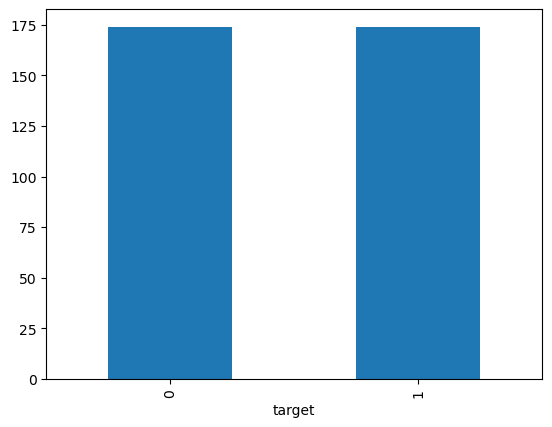

In [5]:
con = Counter(y_train)
print("Przed", con)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
con1 = Counter(y_train_sm)
print("Po", con1)
pd.Series(y_train_sm).value_counts().plot.bar()

### Borderline SMOTE

Przed Counter({0: 174, 1: 52})
Po Counter({0: 174, 1: 174})


<Axes: xlabel='target'>

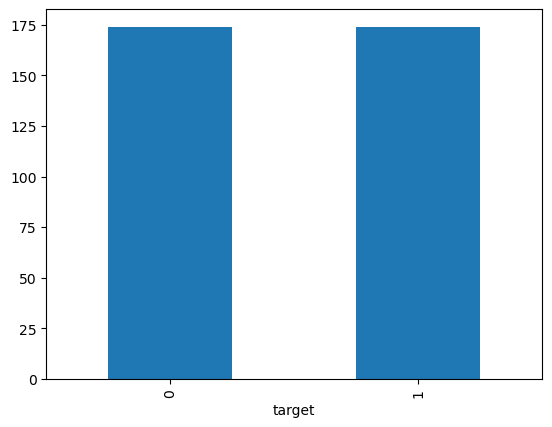

In [6]:
con3 = Counter(y_train)
print("Przed", con3)
brdsmote = BorderlineSMOTE(random_state=42)
X_train_bsm, y_train_bsm = brdsmote.fit_resample(X_train, y_train)
con4 = Counter(y_train_bsm)
print("Po", con4)
pd.Series(y_train_bsm).value_counts().plot.bar()

### Model Prepare

In [9]:
# PARAMS
model_LR = LogisticRegression(  # logistic regression dla niezbalansowanych
    random_state=0, max_iter=100
)
model_LR_SMOTE = LogisticRegression(  # logistic regression dla zbalansowanych SMOTE
    random_state=0, max_iter=100
)
model_LR_BrdSMOTE = LogisticRegression(  # logistic regression dla zbalansowanych BoarderrLineSMOTE
    
)
model_RF = RandomForestClassifier(  # random forest dla niezbalansowanych
    n_estimators=20, max_depth=6, min_samples_leaf=1, random_state=0,
)
model_RF_SMOTE = RandomForestClassifier(  # random forest dla zbalansowanych SMOTE
    n_estimators=20, max_depth=6, min_samples_leaf=1, random_state=0,
)
model_RF_BrdSMOTE = LogisticRegression(  # random forest dla zbalansowanych BoarderrLineSMOTE
    
)
model_DT = DecisionTreeClassifier(  # decision tree dla niezbalansowanych
    max_depth=6, min_samples_leaf=1, random_state=10
)
model_DT_SMOTE = DecisionTreeClassifier(  # decision tree dla zbalansowanych SMOTE
    max_depth=6, min_samples_leaf=1, random_state=10
)
model_DT_BrdSMOTE = LogisticRegression(  # decision tree dla zbalansowanych BoarderrLineSMOTE
    
)
model_XGB = XGBClassifier(  # xgboost dla niezbalansowanych
    max_depth=4, subsample=0.6
)
model_XGB_SMOTE = XGBClassifier(  # xgboost dla zbalansowanych SMOTE
    max_depth=4, subsample=0.5
)
model_XGB_BrdSMOTE = LogisticRegression(  # xgboost dla zbalansowanych BoarderrLineSMOTE
    
)
model_XGB_RF = XGBRFClassifier(  # xgboost rf dla niezbalansowanych
    n_estimators=20, max_depth=4, subsample=0.9, random_state=10
)
model_XGB_RF_SMOTE = XGBRFClassifier(  # xgboost rf dla zbalansowanych SMOTE
    n_estimators=20, max_depth=4, subsample=1, random_state=0
)
model_XGB_RF_BrdSMOTE = LogisticRegression(  # xgboost rf dla zbalansowanych BoarderrLineSMOTE
    
)

# MODEL + TRENING
model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm, y_train_sm)
model_LR_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_RF.fit(X_train, y_train)
model_RF_SMOTE.fit(X_train_sm, y_train_sm)
model_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_DT.fit(X_train, y_train)
model_DT_SMOTE.fit(X_train_sm, y_train_sm)
model_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_XGB.fit(X_train, y_train)
model_XGB_SMOTE.fit(X_train_sm, y_train_sm)
model_XGB_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_XGB_RF.fit(X_train, y_train)
model_XGB_RF_SMOTE.fit(X_train_sm, y_train_sm)
model_XGB_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LogisticRegression()

In [18]:
# MODEL + TRENING
model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm, y_train_sm)
model_LR_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_RF.fit(X_train, y_train)
model_RF_SMOTE.fit(X_train_sm, y_train_sm)
model_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_DT.fit(X_train, y_train)
model_DT_SMOTE.fit(X_train_sm, y_train_sm)
model_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_XGB.fit(X_train, y_train)
model_XGB_SMOTE.fit(X_train_sm, y_train_sm)
model_XGB_BrdSMOTE.fit(X_train_bsm, y_train_bsm)

model_XGB_RF.fit(X_train, y_train)
model_XGB_RF_SMOTE.fit(X_train_sm, y_train_sm)
model_XGB_RF_BrdSMOTE.fit(X_train_bsm, y_train_bsm)


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LogisticRegression()

### Cross-Val-Score

In [10]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
goal = ['precision','f1','recall','accuracy']

for metrix1 in goal:
    
    cross_val_results = cross_val_score(model_LR, X_train, y_train, cv=cv, scoring=metrix1)
    print(f'LR Unbalanced Cross-Validation Results {metrix1}: {cross_val_results}')
    print(f'Mean {metrix1}: {cross_val_results.mean()}')
    print(f'Dev: {cross_val_results.std()}')

    cross_val_results2 = cross_val_score(model_LR_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'LR Balanced Cross-Validation Results {metrix1}: {cross_val_results2}')
    print(f'Mean {metrix1}: {cross_val_results2.mean()}')
    print(f'Dev: {cross_val_results2.std()}')
    
    cross_val_results3 = cross_val_score(model_DT, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'DT Unbalanced Cross-Validation Results {metrix1}: {cross_val_results3}')
    print(f'Mean {metrix1}: {cross_val_results3.mean()}')
    print(f'Dev: {cross_val_results3.std()}')

    cross_val_results4 = cross_val_score(model_DT_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'DT Balanced Cross-Validation Results {metrix1}: {cross_val_results4}')
    print(f'Mean {metrix1}: {cross_val_results4.mean()}')
    print(f'Dev: {cross_val_results4.std()}')

    cross_val_results5 = cross_val_score(model_RF, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'RF Unbalanced Cross-Validation Results {metrix1}: {cross_val_results5}')
    print(f'Mean {metrix1}: {cross_val_results5.mean()}')
    print(f'Dev: {cross_val_results5.std()}')

    cross_val_results6 = cross_val_score(model_RF_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'RF Balanced Cross-Validation Results {metrix1}: {cross_val_results6}')
    print(f'Mean {metrix1}: {cross_val_results6.mean()}')
    print(f'Dev: {cross_val_results6.std()}')
    
    cross_val_results7 = cross_val_score(model_XGB, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'XGBoost Unbalanced Cross-Validation Results {metrix1}: {cross_val_results7}')
    print(f'Mean {metrix1}: {cross_val_results7.mean()}')
    print(f'Dev: {cross_val_results7.std()}')

    cross_val_results8 = cross_val_score(model_XGB_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'XGBoost Balanced Cross-Validation Results {metrix1}: {cross_val_results8}')
    print(f'Mean {metrix1}: {cross_val_results8.mean()}')
    print(f'Dev: {cross_val_results8.std()}')
    
    cross_val_results9 = cross_val_score(model_XGB_RF, X_train, y_train, scoring=metrix1, cv=cv)
    print(f'XGBoost RF Unbalanced Cross-Validation Results {metrix1}: {cross_val_results7}')
    print(f'Mean {metrix1}: {cross_val_results7.mean()}')
    print(f'Dev: {cross_val_results7.std()}')

    cross_val_results10 = cross_val_score(model_XGB_RF_SMOTE, X_train_sm, y_train_sm, scoring=metrix1, cv=cv)
    print(f'XGBoost RF Balanced Cross-Validation Results {metrix1}: {cross_val_results8}')
    print(f'Mean {metrix1}: {cross_val_results8.mean()}')
    print(f'Dev: {cross_val_results8.std()}')

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Unbalanced Cross-Validation Results precision: [0.83333333 0.83333333 1.         0.8        0.75       1.
 1.         1.         0.83333333 1.         0.8        0.8
 0.8        1.         1.         1.         0.71428571 1.
 1.         0.8        1.         1.         1.         0.6
 0.83333333 0.85714286 0.55555556 1.         1.         1.
 1.         1.         0.71428571 1.         1.         1.
 0.8        0.75       0.8        1.         1.         1.
 1.         0.8        1.         0.66666667 0.75       0.75
 0.83333333 0.8        0.8        0.83333333 1.         1.
 1.         0.83333333 1.         0.8        0.83333333 1.
 1.         1.         0.83333333 0.83333333 0.85714286 0.8
 1.         1.         1.         0.83333333 1.         1.
 0.66666667 0.8        1.         1.         0.66666667 0.8
 1.         1.         0.83333333 1.         1.         1.
 0.85714286 0.71428571 1.         0.8        1.         1.
 1.         1.         1.         1.         0.75       1.


c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Balanced Cross-Validation Results precision: [0.84210526 0.89473684 0.93333333 0.94117647 0.85714286 1.
 1.         1.         0.89473684 1.         1.         1.
 0.84210526 0.85       1.         0.94444444 0.94736842 0.94444444
 0.94444444 0.84210526 0.94117647 0.89473684 0.94117647 0.94444444
 0.94444444 1.         0.88235294 0.89473684 0.94444444 0.94444444
 1.         0.77272727 0.94444444 0.88888889 0.94444444 0.94736842
 0.94117647 0.89473684 0.94444444 1.         0.94117647 0.94117647
 0.94117647 1.         0.9        1.         0.94444444 0.9
 1.         0.84210526 0.85       1.         1.         0.93333333
 0.84210526 1.         0.89473684 0.89473684 0.94444444 0.94117647
 0.9375     0.89473684 1.         1.         1.         1.
 0.85714286 0.85714286 0.85       0.94444444 0.88888889 1.
 0.80952381 1.         0.94117647 0.94117647 0.9        1.
 1.         0.9375     0.83333333 0.94444444 0.94444444 1.
 0.85       1.         0.9        1.         0.94117647 0.89473684
 0

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Unbalanced Cross-Validation Results f1: [0.90909091 0.90909091 0.88888889 0.8        0.85714286 0.90909091
 1.         0.75       0.90909091 0.88888889 0.8        0.8
 0.8        1.         0.90909091 0.90909091 0.83333333 1.
 0.88888889 0.8        1.         0.88888889 1.         0.6
 0.83333333 0.92307692 0.71428571 1.         1.         0.88888889
 1.         1.         0.83333333 0.75       1.         1.
 0.8        0.66666667 0.8        0.88888889 1.         1.
 1.         0.8        1.         0.8        0.66666667 0.66666667
 0.90909091 0.8        0.8        0.90909091 0.88888889 0.75
 1.         0.83333333 0.88888889 0.8        0.90909091 1.
 0.88888889 1.         0.90909091 0.90909091 0.92307692 0.72727273
 0.88888889 0.75       1.         0.90909091 1.         1.
 0.72727273 0.8        1.         0.8        0.72727273 0.8
 0.88888889 0.88888889 0.90909091 1.         1.         1.
 0.92307692 0.76923077 0.88888889 0.8        0.88888889 0.88888889
 1.         0.57142857 1.  

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Balanced Cross-Validation Results f1: [0.88888889 0.94444444 0.875      0.94117647 0.92307692 0.97142857
 0.97142857 0.97142857 0.94444444 1.         0.96969697 0.9375
 0.88888889 0.91891892 1.         0.94444444 0.97297297 0.94444444
 0.97142857 0.88888889 0.94117647 0.94444444 0.94117647 0.97142857
 0.94444444 1.         0.85714286 0.91891892 0.97142857 0.97142857
 0.96969697 0.87179487 0.97142857 0.91428571 0.94444444 0.97297297
 0.91428571 0.91891892 0.97142857 0.96969697 0.94117647 0.94117647
 0.94117647 0.9375     0.94736842 1.         0.94444444 0.94736842
 0.96969697 0.88888889 0.91891892 0.96969697 1.         0.875
 0.86486486 1.         0.91891892 0.91891892 0.97142857 0.94117647
 0.90909091 0.94444444 0.96969697 1.         0.90909091 1.
 0.92307692 0.92307692 0.91891892 0.97142857 0.91428571 0.96969697
 0.89473684 1.         0.91428571 0.91428571 0.94736842 1.
 0.96969697 0.90909091 0.85714286 0.97142857 0.97142857 0.9375
 0.89473684 0.97142857 0.94736842 1.         0.941

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Unbalanced Cross-Validation Results recall: [1.         1.         0.8        0.8        1.         0.83333333
 1.         0.6        1.         0.8        0.8        0.8
 0.8        1.         0.83333333 0.83333333 1.         1.
 0.8        0.8        1.         0.8        1.         0.6
 0.83333333 1.         1.         1.         1.         0.8
 1.         1.         1.         0.6        1.         1.
 0.8        0.6        0.8        0.8        1.         1.
 1.         0.8        1.         1.         0.6        0.6
 1.         0.8        0.8        1.         0.8        0.6
 1.         0.83333333 0.8        0.8        1.         1.
 0.8        1.         1.         1.         1.         0.66666667
 0.8        0.6        1.         1.         1.         1.
 0.8        0.8        1.         0.66666667 0.8        0.8
 0.8        0.8        1.         1.         1.         1.
 1.         0.83333333 0.8        0.8        0.8        0.8
 1.         0.4        1.         1.         

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Balanced Cross-Validation Results recall: [0.94117647 1.         0.82352941 0.94117647 1.         0.94444444
 0.94444444 0.94444444 1.         1.         0.94117647 0.88235294
 0.94117647 1.         1.         0.94444444 1.         0.94444444
 1.         0.94117647 0.94117647 1.         0.94117647 1.
 0.94444444 1.         0.83333333 0.94444444 1.         1.
 0.94117647 1.         1.         0.94117647 0.94444444 1.
 0.88888889 0.94444444 1.         0.94117647 0.94117647 0.94117647
 0.94117647 0.88235294 1.         1.         0.94444444 1.
 0.94117647 0.94117647 1.         0.94117647 1.         0.82352941
 0.88888889 1.         0.94444444 0.94444444 1.         0.94117647
 0.88235294 1.         0.94117647 1.         0.83333333 1.
 1.         1.         1.         1.         0.94117647 0.94117647
 1.         1.         0.88888889 0.88888889 1.         1.
 0.94117647 0.88235294 0.88235294 1.         1.         0.88235294
 0.94444444 0.94444444 1.         1.         0.94117647 1.
 1.   

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Unbalanced Cross-Validation Results accuracy: [0.95652174 0.95652174 0.95652174 0.91304348 0.91304348 0.95652174
 1.         0.90909091 0.95454545 0.95454545 0.91304348 0.91304348
 0.91304348 1.         0.95652174 0.95652174 0.90909091 1.
 0.95454545 0.90909091 1.         0.95652174 1.         0.82608696
 0.91304348 0.95652174 0.81818182 1.         1.         0.95454545
 1.         1.         0.91304348 0.91304348 1.         1.
 0.90909091 0.86363636 0.90909091 0.95454545 1.         1.
 1.         0.91304348 1.         0.86956522 0.86363636 0.86363636
 0.95454545 0.90909091 0.91304348 0.95652174 0.95652174 0.91304348
 1.         0.91304348 0.95454545 0.90909091 0.95454545 1.
 0.95652174 1.         0.95652174 0.95652174 0.95652174 0.86956522
 0.95454545 0.90909091 1.         0.95454545 1.         1.
 0.86956522 0.91304348 1.         0.91304348 0.86363636 0.90909091
 0.95454545 0.95454545 0.95652174 1.         1.         1.
 0.95652174 0.86956522 0.95454545 0.90909091 0.95454545 0.954

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR Balanced Cross-Validation Results accuracy: [0.88571429 0.94285714 0.88571429 0.94285714 0.91428571 0.97142857
 0.97142857 0.97142857 0.94117647 1.         0.97142857 0.94285714
 0.88571429 0.91428571 1.         0.94285714 0.97142857 0.94285714
 0.97058824 0.88235294 0.94285714 0.94285714 0.94285714 0.97142857
 0.94285714 1.         0.85714286 0.91428571 0.97058824 0.97058824
 0.97142857 0.85714286 0.97142857 0.91428571 0.94285714 0.97142857
 0.91428571 0.91428571 0.97058824 0.97058824 0.94285714 0.94285714
 0.94285714 0.94285714 0.94285714 1.         0.94285714 0.94285714
 0.97058824 0.88235294 0.91428571 0.97142857 1.         0.88571429
 0.85714286 1.         0.91428571 0.91428571 0.97058824 0.94117647
 0.91428571 0.94285714 0.97142857 1.         0.91428571 1.
 0.91428571 0.91428571 0.91176471 0.97058824 0.91428571 0.97142857
 0.88571429 1.         0.91428571 0.91428571 0.94285714 1.
 0.97058824 0.91176471 0.85714286 0.97142857 0.97142857 0.94285714
 0.88571429 0.97142857 0.942857

### Dobor parametrow przy pomocy GridSerach PC BOOM BOOM

In [21]:
params_LR = {                               # dla LR
    'max_iter':[100,500,1000],              # ilosc iteracji
    # #'class_weight':['balanced', 'none'],   # wagi dla poszczegolnych klas
    'random_state':[0,10,20,30,40]         # ustalona losowość dla powtarzalności
    
}

params_DT = {                               # dla DT
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
    'min_samples_leaf':[1,2]                # minimalna ilosc probek lisci
}

params_RF = {
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'min_samples_leaf':[1,2],               # minimalna ilosc probek lisci
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
}

params_XGB = {                              # dla XGBoost
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'subsample':[0.5,0.6,0.7,0.8,0.9,1]
}

params_XGB_RF = {                           # dla XGBoost RF
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'random_state':[0,10,20,30,40]          # ustalona losowość dla powtarzalności
}

goal = ["precision", "recall", "f1", "accuracy"] 
score_1 = "precision"

#for score_1 in goal :
    
model_LR_BrdSMOTE = GridSearchCV(model_LR_BrdSMOTE,param_grid=params_LR,scoring=score_1).fit(X_train_bsm,y_train_bsm)
model_DT_BrdSMOTE = GridSearchCV(model_DT_BrdSMOTE,param_grid=params_DT,scoring=score_1).fit(X_train_bsm,y_train_bsm)
model_RF_BrdSMOTE = GridSearchCV(model_RF_BrdSMOTE,param_grid=params_RF,scoring=score_1).fit(X_train_bsm,y_train_bsm)
model_XGB_BrdSMOTE = GridSearchCV(model_XGB_BrdSMOTE,param_grid=params_XGB, scoring=score_1).fit(X_train_bsm,y_train_bsm)
model_XGB_RF_BrdSMOTE = GridSearchCV(model_XGB_RF_BrdSMOTE,param_grid=params_XGB_RF,scoring=score_1).fit(X_train_bsm,y_train_bsm)
   
print(f'Best parameters for {score_1} & LR + BorderLineSMOTE:', model_LR_BrdSMOTE.best_params_)
print(f'Best score for {score_1} & LR + BorderLineSMOTE:', model_LR_BrdSMOTE.best_score_)
print(f'Best parameters for {score_1} & DT + BorderLineSMOTE:', model_DT_BrdSMOTE.best_params_)
print(f'Best score for {score_1} & DT + BorderLineSMOTE:', model_DT_BrdSMOTE.best_score_)
print(f'Best parameters for {score_1} & RF + BorderLineSMOTE:', model_RF_BrdSMOTE.best_params_)
print(f'Best score for {score_1} & RF + BorderLineSMOTE:', model_RF_BrdSMOTE.best_score_)
print(f'Best parameters for {score_1} & XGB + BorderLineSMOTE:', model_XGB_BrdSMOTE.best_params_)
print(f'Best score for {score_1} & XGB + BorderLineSMOTE:', model_XGB_BrdSMOTE.best_score_)
print(f'Best parameters for {score_1} & XGB RF + BorderLineSMOTE:', model_XGB_RF_BrdSMOTE.best_params_)
print(f'Best score for {score_1} & XGB RF + BorderLineSMOTE:', model_XGB_RF_BrdSMOTE.best_score_) 


ValueError: Invalid parameter 'max_iter' for estimator GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 500, 1000],
                         'random_state': [0, 10, 20, 30, 40]},
             scoring='f1'). Valid parameters are: ['cv', 'error_score', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'].

In [20]:

# PARAMS to Search
params_LR = {                               # dla LR
    #'class_weight':['balanced', 'none'],   # wagi dla poszczegolnych klas
    'max_iter':[100,500,1000]  ,
    'random_state':[0,10,20,30,40]        # ustalona losowość dla powtarzalności
                # ilosc iteracji
}

params_DT = {                               # dla DT
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
    'min_samples_leaf':[1,2]                # minimalna ilosc probek lisci
}

params_RF = {
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'min_samples_leaf':[1,2],               # minimalna ilosc probek lisci
    'random_state':[0,10,20,30,40],         # ustalona losowość dla powtarzalności
}

params_XGB = {                              # dla XGBoost
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'subsample':[0.5,0.6,0.7,0.8,0.9,1]
}

params_XGB_RF = {                           # dla XGBoost RF
    'max_depth':[4,8,12,16],                # maksymalna głębokość drzewa
    'n_estimators':[20,40,60,80,100],       # rozmiar lasu
    'subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'random_state':[0,10,20,30,40]          # ustalona losowość dla powtarzalności
}

# All models Search

# analiza dla poszczegolnych celów
goal = [ "f1", "recall", "precision", "accuracy"]      #najlepsze parametryd dla wybranej metryki ('recall','f1','precision','accuracy')

for score_1 in goal:
    #model default
    #model_LR = GridSearchCV(model_LR,param_grid=params_LR,scoring=score_1).fit(X_train,y_train)
    #model_DT = GridSearchCV(model_DT,param_grid=params_DT,scoring=score_1).fit(X_train,y_train)
    #model_RF = GridSearchCV(model_RF,param_grid=params_RF,scoring=score_1).fit(X_train,y_train)
    #model_XGB = GridSearchCV(model_XGB,param_grid=params_XGB,scoring=score_1).fit(X_train,y_train)
    #model_XGB_RF = GridSearchCV(model_XGB_RF,param_grid=params_XGB_RF,scoring=score_1).fit(X_train,y_train)
    
    #model + SMOTE
    #model_LR_SMOTE = GridSearchCV(model_LR_SMOTE,param_grid=params_LR,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_DT_SMOTE = GridSearchCV(model_DT_SMOTE,param_grid=params_DT,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_RF_SMOTE = GridSearchCV(model_RF_SMOTE,param_grid=params_RF,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_XGB_SMOTE = GridSearchCV(model_XGB_SMOTE,param_grid=params_XGB,scoring=score_1).fit(X_train_sm,y_train_sm)
    #model_XGB_RF_SMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params_XGB_RF,scoring=score_1).fit(X_train_sm,y_train_sm)
    
    #model + BoarderLineSMOTE
    LR_BrdSMOTE = GridSearchCV(model_LR_BrdSMOTE,param_grid=params_LR,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    DT_BrdSMOTE = GridSearchCV(model_DT_BrdSMOTE,param_grid=params_DT,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    RF_BrdSMOTE = GridSearchCV(model_RF_BrdSMOTE,param_grid=params_RF,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    XGB_BrdSMOTE = GridSearchCV(model_XGB_BrdSMOTE,param_grid=params_XGB,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    XGB_RF_BrdSMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params_XGB_RF,scoring=score_1).fit(X_train_bsm,y_train_bsm)
    
    
    print(f'Goal: {score_1}')
    
    #model default
    print(f'Best parameters for {score_1} & LR :', model_LR.best_params_)
    print(f'Best score for {score_1} & LR:', model_LR.best_score_) 
    print(f'Best parameters for {score_1} & RF:', model_RF.best_params_)
    print(f'Best score for {score_1} & RF:', model_RF.best_score_)
    print(f'Best parameters for {score_1} & DT:', model_DT.best_params_)
    print(f'Best score for {score_1} & DT:', model_DT.best_score_)
    print(f'Best parameters for {score_1} & XGBoost:', model_XGB.best_params_)
    print(f'Best score for {score_1} & XGBoost:', model_XGB.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF:', model_XGB_RF.best_params_)
    print(f'Best score for {score_1} & XGBoost RF:', model_XGB_RF.best_score_)
    
    #model + SMOTE
    print(f'Best parameters for {score_1} & LR + SMOTE:', model_LR_SMOTE.best_params_)
    print(f'Best score for {score_1} & LR + SMOTE:', model_LR_SMOTE.best_score_)
    print(f'Best parameters for {score_1} & RF + SMOTE:', model_RF.best_params_)
    print(f'Best score for {score_1} & RF + SMOTE:', model_RF.best_score_)
    print(f'Best parameters for {score_1} & DT + SMOTE:', model_DT_SMOTE.best_params_)
    print(f'Best score for {score_1} & DT + SMOTE:', model_DT_SMOTE.best_score_) 
    print(f'Best parameters for {score_1} & XGBoost + SMOTE:', model_XGB_SMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost + SMOTE:', model_XGB_SMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF + SMOTE:', model_XGB_RF_SMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost RF + SMOTE:', model_XGB_RF_SMOTE.best_score_) 
    
    #model + BoarderLineSMOTE
    print(f'Best parameters for {score_1} & LR + BoarderLineSMOTE:', LR_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & LR + BoarderLineSMOTE:', LR_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & DT + BoarderLineSMOTE:', DT_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & DT + BoarderLineSMOTE:', DT_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & RF + BoarderLineSMOTE:', RF_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & RF + BoarderLineSMOTE:', RF_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost + BoarderLineSMOTE:', XGB_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & XGBoost + BoarderLineSMOTE:', XGB_BrdSMOTE.best_score_)
    print(f'Best parameters for {score_1} & XGBoost RF + BoarderLineSMOTE:', XGB_RF_BrdSMOTE.best_params_)
    print(f'Best score for {score_1} & XGboost RF + BoarderLineSMOTE:', XGB_RF_BrdSMOTE.best_score_)
    
    
    
    
    
    
    
    
    


# One model Search
# Dobor parametrow do analizy
""" params1 = {                               # dla LR
    'max_iter':[100,500,1000,1500]    ,           # ilosc iteracji
    #'class_weight':['balanced', 'none'],   # wagi dla poszczegolnych klas
    'random_state':[0,10,20,30,40]         # ustalona losowość dla powtarzalności
    
}

# Prezentacja wyników analizy
model_LR = GridSearchCV(model_LR,param_grid=params1,scoring="precision").fit(X_train,y_train)
model_LR_BrdSMOTE = GridSearchCV(model_LR_BrdSMOTE,param_grid=params1,scoring="precision").fit(X_train_bsm,y_train_bsm)
print('Best parameters XGBoost:', model_LR.best_params_)
print('Best score XGBoost:', model_LR.best_score_)
print('Best parameters XGBoost + SMOTE:', model_LR_BrdSMOTE.best_params_)
print('Best score:', model_LR_BrdSMOTE.best_score_)
model_DT = GridSearchCV(model_DT,param_grid=params1,scoring="accuracy").fit(X_train,y_train)
model_DT_BrdSMOTE = GridSearchCV(model_DT_BrdSMOTE,param_grid=params1,scoring="accuracy").fit(X_train_bsm,y_train_bsm)
print('Best parameters XGBoost:', model_DT.best_params_)
print('Best score XGBoost:', model_DT.best_score_)
print('Best parameters XGBoost + SMOTE:', model_DT_BrdSMOTE.best_params_)
print('Best score:', model_DT_BrdSMOTE.best_score_)
model_RF = GridSearchCV(model_XGB_RF,param_grid=params1,scoring="f1").fit(X_train,y_train)
model_LR_BrdSMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params1,scoring="f1").fit(X_train_bsm,y_train_bsm)
print('Best parameters XGBoost:', model_XGB.best_params_)
print('Best score XGBoost:', model_XGB.best_score_)
print('Best parameters XGBoost + SMOTE:', model_LR_BrdSMOTE.best_params_)
print('Best score:', model_LR_BrdSMOTE.best_score_)
model_XGB = GridSearchCV(model_XGB_RF,param_grid=params1,scoring="recall").fit(X_train,y_train)
model_LR_BrdSMOTE = GridSearchCV(model_XGB_RF_SMOTE,param_grid=params1,scoring="recall").fit(X_train_bsm,y_train_bsm)
print('Best parameters XGBoost:', model_XGB.best_params_)
print('Best score XGBoost:', model_XGB.best_score_)
print('Best parameters XGBoost + SMOTE:', model_LR_BrdSMOTE.best_params_)
print('Best score:', model_LR_BrdSMOTE.best_score_) """

ValueError: Invalid parameter 'max_iter' for estimator GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 500, 1000],
                         'random_state': [0, 10, 20, 30, 40]},
             scoring='f1'). Valid parameters are: ['cv', 'error_score', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'].

## Wyniki:

### Metryki

In [ ]:
# LR
y_pred_LR = model_LR.predict(X_test)
print("LR dla nie zbalansowanych\n", classification_report(y_test, y_pred_LR))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print("LR dla nie zbalansowanych\n", classification_report(y_test, y_pred_LR_SMOTE))

# RF
y_pred_RF = model_RF.predict(X_test)
print("RF dla nie zbalansowanych\n", classification_report(y_test, y_pred_RF))
y_pred_RF_SMOTE = model_RF_SMOTE.predict(X_test)
print("RF dla zbalansowanych\n", classification_report(y_test, y_pred_RF_SMOTE))

# DT
y_pred_DT = model_DT.predict(X_test)
print("DT dla nie zbalansowanych\n", classification_report(y_test, y_pred_DT))
y_pred_DT_SMOTE = model_DT_SMOTE.predict(X_test)
print("DT dla zbalansowanych\n", classification_report(y_test, y_pred_DT_SMOTE))

# XGBOOST
y_pred_xgb = model_XGB.predict(X_test)
print("XGBoost dla niezbalansowanych\n", classification_report(y_test, y_pred_xgb))
y_pred_xgb_smote = model_XGB_SMOTE.predict(X_test)
print("XGBoost dla zbalansowanych\n", classification_report(y_test, y_pred_xgb_smote))

# XGBOOST SMOTE
y_pred_xgb_rs = model_XGB_RF.predict(X_test)
print(
    "XGBoost RF dla niezbalansowanych\n", classification_report(y_test, y_pred_xgb_rs)
)
y_pred_xgb_rs_smote = model_XGB_RF_SMOTE.predict(X_test)
print(
    "XGBoost dla zbalansowanych\n", classification_report(y_test, y_pred_xgb_rs_smote)
)

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.94      0.89      0.92        19

    accuracy                           0.95        57
   macro avg       0.95      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.90      0.95      0.92        19

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57

RF dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.95      0.95      0.95        19

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96    

### Heatmap

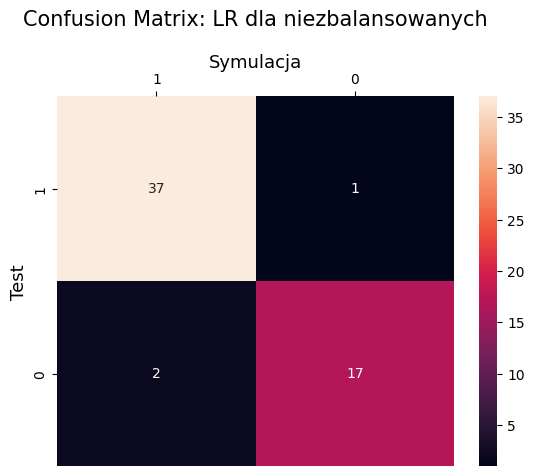

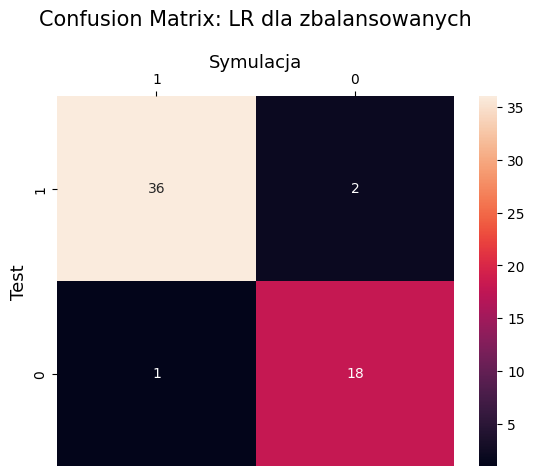

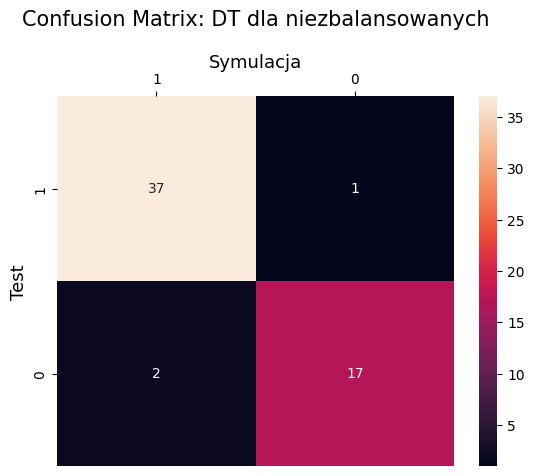

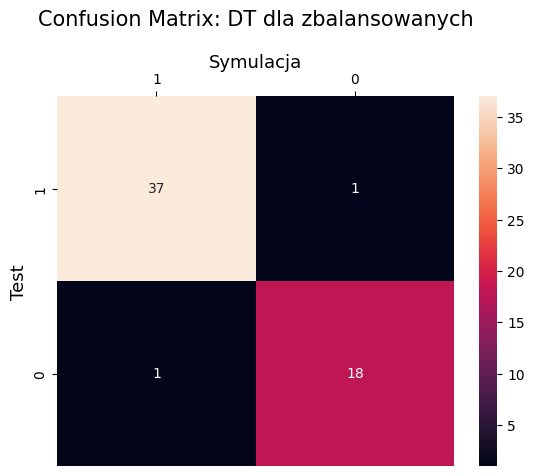

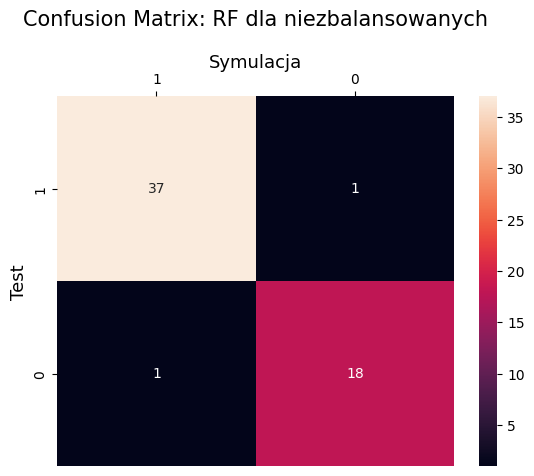

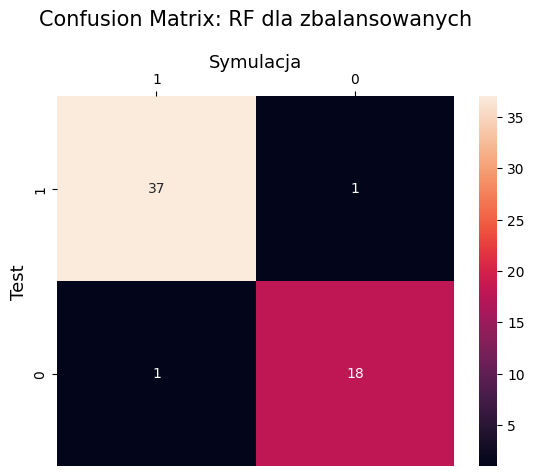

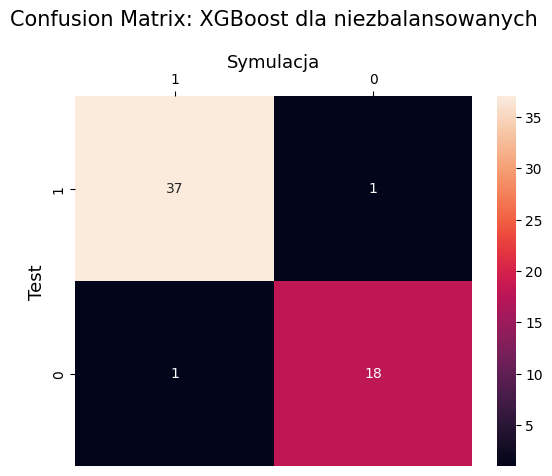

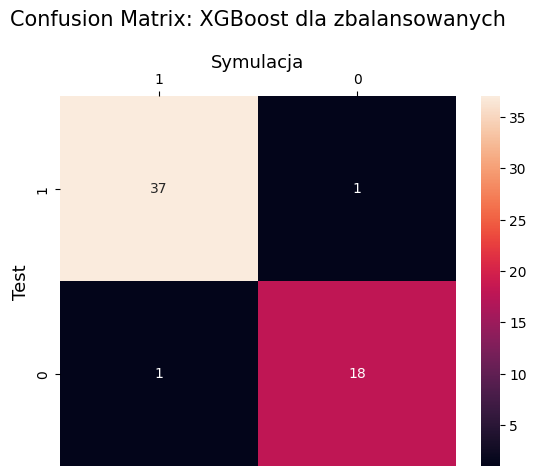

In [ ]:
conf_mat_LR = confusion_matrix(y_test, y_pred_LR)
conf_mat_LR_SMOTE = confusion_matrix(y_test, y_pred_LR_SMOTE)
conf_mat_RF = confusion_matrix(y_test, y_pred_RF)
conf_mat_RF_SMOTE = confusion_matrix(y_test, y_pred_RF_SMOTE)
conf_mat_DT = confusion_matrix(y_test, y_pred_DT)
conf_mat_DT_SMOTE = confusion_matrix(y_test, y_pred_DT_SMOTE)
conf_mat_XGB = confusion_matrix(y_test, y_pred_xgb)
conf_mat_XGB_SMOTE = confusion_matrix(y_test, y_pred_xgb_smote)

conf_matrices = [
    conf_mat_LR,
    conf_mat_LR_SMOTE,
    conf_mat_DT,
    conf_mat_DT_SMOTE,
    conf_mat_RF,
    conf_mat_RF_SMOTE,
    conf_mat_XGB,
    conf_mat_XGB_SMOTE,
]
model_names = [
    "LR dla niezbalansowanych",
    "LR dla zbalansowanych",
    "DT dla niezbalansowanych",
    "DT dla zbalansowanych",
    "RF dla niezbalansowanych",
    "RF dla zbalansowanych",
    "XGBoost dla niezbalansowanych",
    "XGBoost dla zbalansowanych",
]
for conf_mat, model_name in zip(conf_matrices, model_names):
    sns.heatmap(conf_mat, annot=True, xticklabels=["1", "0"], yticklabels=["1", "0"])
    plt.ylabel("Test", fontsize=13)
    plt.title(f"Confusion Matrix: {model_name}", fontsize=15, pad=20)
    plt.gca().xaxis.set_label_position("top")
    plt.xlabel("Symulacja", fontsize=13)
    plt.gca().xaxis.tick_top()
    plt.show()


### Drzewa decyzyjne

In [ ]:
# TREE dla DT
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
tree.plot_tree(model_DT, feature_names=df.columns.tolist(), filled=True, fontsize=10)
plt.title("Decision Tree from Decision Tree with unbalanced data")
# fig.savefig('../reports/Results/tree/tree_DT_1.png')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
plot_tree(model_DT_SMOTE, feature_names=df.columns.tolist(), filled=True, fontsize=10)
plt.title("Decision Tree from Decision Tree with balanced data")
# fig.savefig('../reports/Results/tree/tree_DT_SMOTE_1.png')

# TREE dla RF
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
tree.plot_tree(
    model_RF.estimators_[0], feature_names=df.columns.tolist(), filled=True, fontsize=10
)
plt.title("First Decision Tree from Random Forest with unbalanced data")
# fig.savefig('../reports/Results/tree/tree_RF.png')

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=800)
tree.plot_tree(
    model_RF_SMOTE.estimators_[0],
    feature_names=df.columns.tolist(),
    filled=True,
    fontsize=10,
)
plt.title("First Decision Tree from Random Forest with balanced data")
# fig.savefig('../reports/Results/tree/tree_RF_SMOTE.png')

# PC boom boom
""" fig, axes = plt.subplots(nrows = 1,ncols = 20,figsize = (60,10), dpi=900)
for index in range(0, 20):
    tree.plot_tree(model_RF.estimators_[index],
                   feature_names=dtrain.columns.tolist(), 
                   filled = True,
                   ax = axes[index],
                   fontsize=4)

    axes[index].set_title('Estimator: ' + str(index), fontsize = 10)
fig.savefig('../reports/Results/tree/tree_1_RF7.png') """

NameError: name 'dtrain' is not defined